# W4 Lab Assignment

This lab is more about experimenting instead of coding. We will cover Stevens’ power-law and matplotlib's colormaps.

First, import libraries and use the `matplotlib inline` magic command:

In [29]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

# Stevens’ power-law and your own psychophysics experiment!

Let's generate two numbers and represent them in lengths and areas respectively. As we only care about their ratio, we set one number to 0.01 and the other one 0.01\*ratio, where the ratio is generated randomly from the interval \[2,10\]. The [**`random`**](https://docs.python.org/2/library/random.html) module in Python provides various random number generators, and we can use the [**`random.uniform(a,b)`**](https://docs.python.org/2/library/random.html#random.uniform) function to get a float in [a,b].

In [160]:
import random
import time

n1 = 0.01
length_perceived = []
length_actual = []

Let's then plot them with a horizontal bar chart using the [**`pyplot.barh()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh) function.

([<matplotlib.axis.YTick at 0x11fa0ac88>,
 <a list of 3 Text yticklabel objects>)

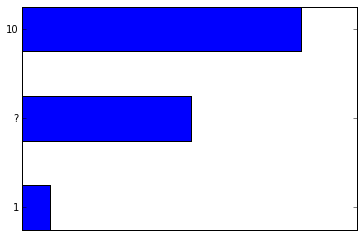

In [157]:
n2 = n1 * random.uniform(1,10)

plt.barh(np.arange(3), [n1, n2, 0.1], height=0.5)
plt.gca().set_frame_on(True)
plt.gca().get_xaxis().set_visible(False)
plt.yticks(np.arange(3)+0.25, ('1', '?', '10'))

In [147]:
length_perceived.append(3) # put the ratio that you perceived and run this cell (shift + enter). 

length_actual.append(n2/n1)
print('{:.2f}'.format(n2/n1))

2.31


Now we can draw the scatter plot of perceived and actual length.

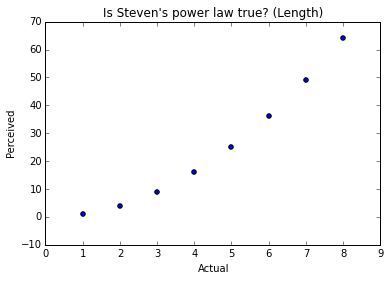

In [162]:
length_actual = [1,2,3,4,5,6,7,8]
length_perceived = [1,4,9,16,25,36,49,64]
plt.scatter(length_actual, length_perceived)
plt.title("Is Steven's power law true? (Length)")
plt.xlabel("Actual")
plt.ylabel("Perceived")

After plotting, let's fit it using a polynomial function. We can easily do it using Scipy's [**`curve_fit()`**](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function.

In [168]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.power(x, b) + c

popt, pcov = curve_fit(func, length_actual, length_perceived)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

1.00 x^2.00 + 0.00


Now, we represent the two numbers as circles. We can calculate the radius given its area and then plot using the **`Circle()`** function.

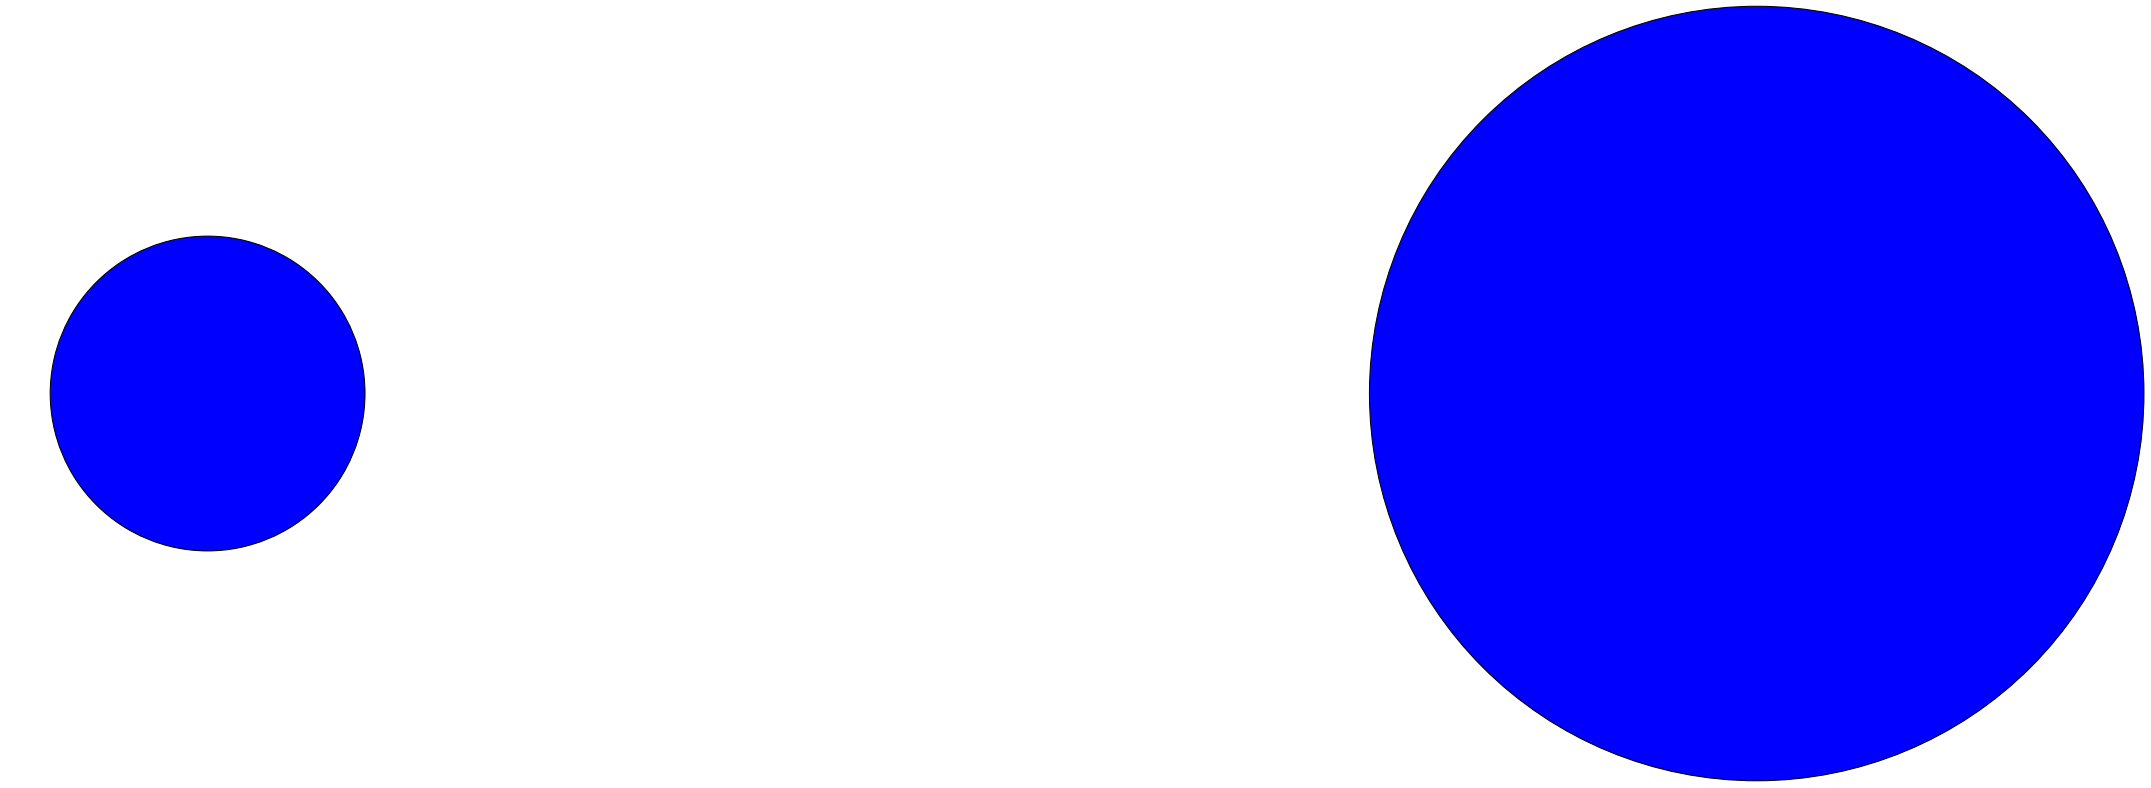

In [158]:
import math

radius1 = math.sqrt(n1/math.pi) # area = pi * r * r
radius2 = math.sqrt(n2/math.pi)

plt.axis('equal')
plt.axis('off')
circ1 = plt.Circle( (0,0),         radius1, clip_on=False )
circ2 = plt.Circle( (4*radius2,0), radius2, clip_on=False )
plt.gca().add_artist(circ1)
plt.gca().add_artist(circ2)

How about the ratio between the areas of the two circles? Write down your answer [**here**]

Let's reveal the correct answer.

In [5]:
print(n2/n1)

8.376688295146515


# Colormaps

Let's plot a sine and cosine wave respectively with red and green color.

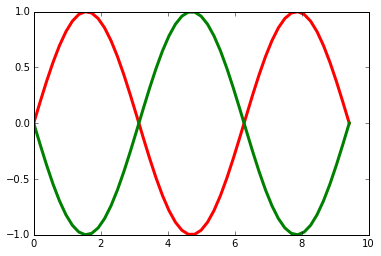

In [6]:
x = np.linspace(0, 3*np.pi)
plt.plot(x, np.sin(x), color='r', lw=3)
plt.plot(x, np.sin(x-np.pi), color='g', lw=3)

We can also use different color schemes in matplotlib. Here you can find them

http://matplotlib.org/users/colormaps.html

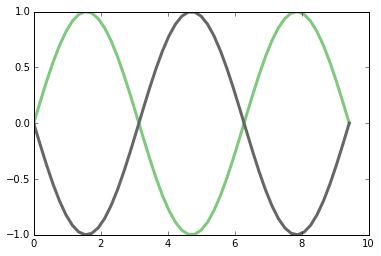

In [7]:
plt.plot(x, np.sin(x), color=plt.cm.Accent(0), lw=3)
plt.plot(x, np.sin(x-np.pi), color=plt.cm.Accent(1.0), lw=3)

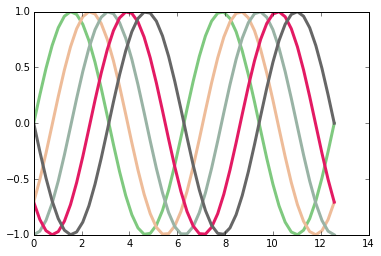

In [9]:
num_lines = 5
x = np.linspace(0, 4*np.pi)
shift = np.linspace(0, np.pi, num_lines)
color_idx = np.linspace(0, 1, num_lines)
for i in range(len(color_idx)):
    plt.plot(x, np.sin(x - shift[i]), color=plt.cm.Accent(color_idx[i]), lw=3)

Try different color schemes by changing the `color=plt.cm.Accent(color_idx[i]), lw=3)` with different scheme names.

# Colormap and images

http://matplotlib.org/users/image_tutorial.html

We can also display an image using Colormaps.

In [31]:
import colormaps as cmaps
import matplotlib.image as mpimg

In [15]:
img = mpimg.imread('sneakySnake.png')
lum_img = np.flipud(img[:,:,0])

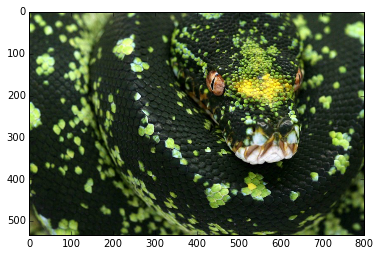

In [36]:
plt.imshow(img)

In [37]:
img[0]

array([[ 0.2       ,  0.28627452,  0.19607843],
       [ 0.16862746,  0.25490198,  0.16470589],
       [ 0.17254902,  0.24705882,  0.17254902],
       ..., 
       [ 0.53725493,  0.64313728,  0.52156866],
       [ 0.50196081,  0.60000002,  0.48235294],
       [ 0.46666667,  0.56470591,  0.44705883]], dtype=float32)

In [38]:
img[0][0]

array([ 0.2       ,  0.28627452,  0.19607843], dtype=float32)

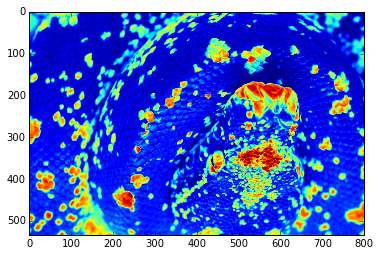

In [42]:
plt.imshow(np.flipud(img[:,:,0]))

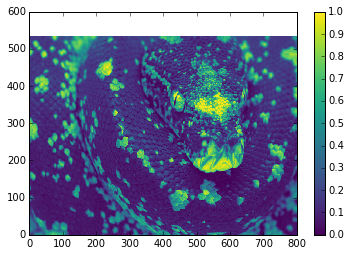

In [25]:
plt.pcolormesh(lum_img, cmap=cmaps.viridis)
plt.colorbar()

From http://matplotlib.org/examples/pylab_examples/pcolor_demo.html

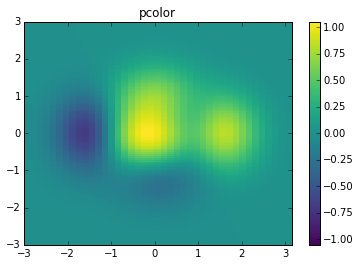

In [28]:
dx, dy = 0.15, 0.05
y, x = np.mgrid[slice(-3, 3 + dy, dy),
                slice(-3, 3 + dx, dx)]
z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

plt.pcolor(x, y, z, cmap=cmaps.viridis, vmin=z_min, vmax=z_max)
plt.title('pcolor')
# set the limits of the plot to the limits of the data
plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()


In [43]:
y, x = np.mgrid[slice(-3, 3 + dy, dy),
                slice(-3, 3 + dx, dx)]



In [45]:
y

array([[-3.  , -3.  , -3.  , ..., -3.  , -3.  , -3.  ],
       [-2.95, -2.95, -2.95, ..., -2.95, -2.95, -2.95],
       [-2.9 , -2.9 , -2.9 , ..., -2.9 , -2.9 , -2.9 ],
       ..., 
       [ 2.9 ,  2.9 ,  2.9 , ...,  2.9 ,  2.9 ,  2.9 ],
       [ 2.95,  2.95,  2.95, ...,  2.95,  2.95,  2.95],
       [ 3.  ,  3.  ,  3.  , ...,  3.  ,  3.  ,  3.  ]])

In [46]:
x

array([[-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15],
       [-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15],
       [-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15],
       ..., 
       [-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15],
       [-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15],
       [-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15]])